Question 7

In [ ]:
from IPython.display import Image
Image("Ode
      .png")

1)
\begin{equation}
    y'' + 5y' - 6y =0
\end{equation}


The equation in above is a homogeneous linear second order ODE. To solve it , we find it's characteristic equation.

Let   $y = e^{mx}$   then   $y' = me^{mx}$  and  $y" = m^2 e^{mx}$


 Making the above substitution  for $y$ in , the ODE
 
 \begin{equation}
     m^2 + 5m -6 = 0 
 \end{equation}

The above is a quadratic equation in terms of $m$. So simplifying,
 \begin{equation}
     (m -1)(m+6) = 0 
 \end{equation}
 
So the roots to the equation are $m_1 = 1$ and $ m_2 = -6$, which are real and distinct, hence the solutions  are of the form, $y_1 = e^{m_1 x} = e^{x} $ and  $y_2 = e^{m_2 x} =e^{-6x} $
 So the solution to the homogeneous equation is ,
 
 \begin{equation}\label{yhom}
     y(x)= C_1 e^{x} + C_2e^{-6x}
 \end{equation} 

Now using the the given initial values find the values of $C_1$ and $C_2$,

\begin{align}
   y(0)&=2 \\
   C_1 e^{0} + C_2e^{0}&=2\\
   C_1 &= 2 - C_2\\
\end{align}  

\begin{align}
y'(0) &= 3\\
C_1 e^{-2x} -6C_2e^{-3x} &=3\\
C_1 e^{0} -6C_2e^{0} &=3 \\
C_1 -6C_2 &=3\\
\end{align}

 Hence -2(2 - C_2)-6C_2 =3
 $$ C_2 = -\frac{1}{7}$$
 $$C_1 =\frac{15}{7}$$
 
 So the  exact solution to the ODE is ,
 \begin{equation}\
     y(x)= \frac{15}{7} e^{x} - \frac{1}{7}e^{-6x}
 \end{equation}

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

2) Rewriting the second order differential equation as  a first order equation, by variable substitution,

$$
\begin{cases}
z_0& = & y\\\\
z_1& = & y'\\\\
z_1'& = & y''
\end{cases}
$$

the result is the system of first order ODE below;

$$
\begin{cases}
z_1'& = & 6z_0 -5z_1\\
z_0'& = z_1\\\
\end{cases}, z_0(0) = 2 , z_1 (0) = 3
$$

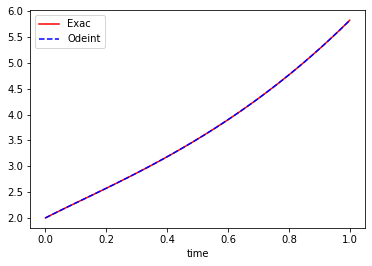

In [15]:
# The Exact Solution 

y= lambda t: (15/7)*np.exp(x) -(1/7)*np.exp(-6*x)


#Solving the ODE using the python function  Odeint

def ODE(z,x):
    z_0, z_1 = z
    dz_1 = 6*z_0 - 5*z_1
    dz_0 = z_1
    return np.array([dz_0,dz_1])


z0 =np.array([2,3])
a = 0
b = 1
N= 100
x = np.linspace(a,b,N+1)

# solve ODE
z = odeint(ODE,z0,x)

z_0p = z[:,0]



plt.plot(x,y(x),'r' , label= "Exac")
plt.plot(x,z_0p,'--b',label= "Odeint")
plt.xlabel('time')
# plt.ylabel('x1(t).error')
plt.legend()
plt.show()





 Solving the ODE using the Runge-Kutta method



\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}

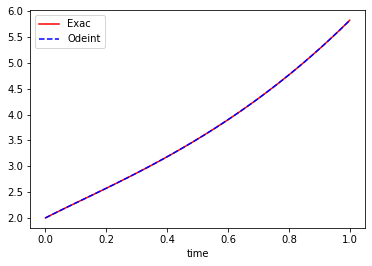

In [17]:

def Rk4(f, c,t):
    H = t[3]-t[2]
    N = t.shape[0]
    M = c.shape[0]
    Z = np.empty((N,M))
    Z[0]= c
    z0=c
    for i in range(1,N):
        k1= f(z0,t[i])
        k2= f(z0+ H*(k1/2), t[i] + H/2)
        k3= f(z0+ H*(k2/2), t[i] + H/2)
        k4 =f(z0+ H*k3, t[i] + H)
        z0 = z0 + H/6*(k1 +2*k2 +2*k3 + k4 )
        Z[i]= z0 
    return Z


D=Rk4(ODE,z0,x)
z_1Rp = D[:,0]
plt.plot(x,y(x),'r' , label= "Exact")
plt.plot(x,z_1Rp,'--b',label= "Odeint")
plt.xlabel('time')
plt.legend()
plt.show()

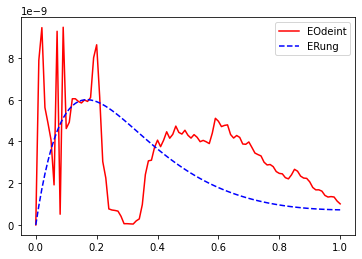

In [22]:
# Error in  Odeint

E1=abs(y(x)  - z_0p)
E2=abs(y(x)  - z_1Rp)


#Error in RK4OdeSys
plt.plot(x,E1,'r' , label= "EOdeint")
plt.plot(x,E2,'--b',label= "ERung")
plt.legend()
plt.show()                  
                  
                  
                  

The Odeint function is better because from the graph it has smaller absolute erro with the exact solution 